In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart1.csv")
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,55,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## VERİYE GENEL BAKIŞ

In [3]:
df.shape

(289, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.010381,0.678201,1.020761,131.377163,247.961938,0.145329,0.515571,150.231834,0.318339,1.007612,1.418685,0.712803,2.314879,0.570934
std,9.132316,0.467977,1.027192,17.518432,51.596208,0.353043,0.514309,22.899650,0.466640,1.133491,0.613333,1.022596,0.596128,0.495801
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## VERİ ÖNİŞLEME ADIMLARI

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.duplicated().value_counts() # 1 ADET TEKRAR EDEN VERİ VAR.

False    288
True       1
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().value_counts() # TEKRAR EDEN VERİ KALDIRILDI.

False    288
dtype: int64

In [12]:
df["sex"].value_counts()

1    195
0     93
Name: sex, dtype: int64

In [13]:
for i in list(df.columns):
    print("{}--{}".format(i,df[i].value_counts().shape[0]))

age--41
sex--2
cp--4
trtbps--47
chol--147
fbs--2
restecg--3
thalachh--90
exng--2
oldpeak--39
slp--3
caa--5
thall--4
output--2


In [14]:
kategorik=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

In [15]:
df_kat=df.loc[:,kategorik]
df_kat

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
284,1,0,0,0,1,2,1,3,0
285,1,0,0,1,1,1,2,3,0
286,1,3,0,1,0,2,2,2,0
287,1,1,0,0,0,2,1,2,0


## VERİ GÖRSELLEŞTİRME ADIMLARI

<Axes: >

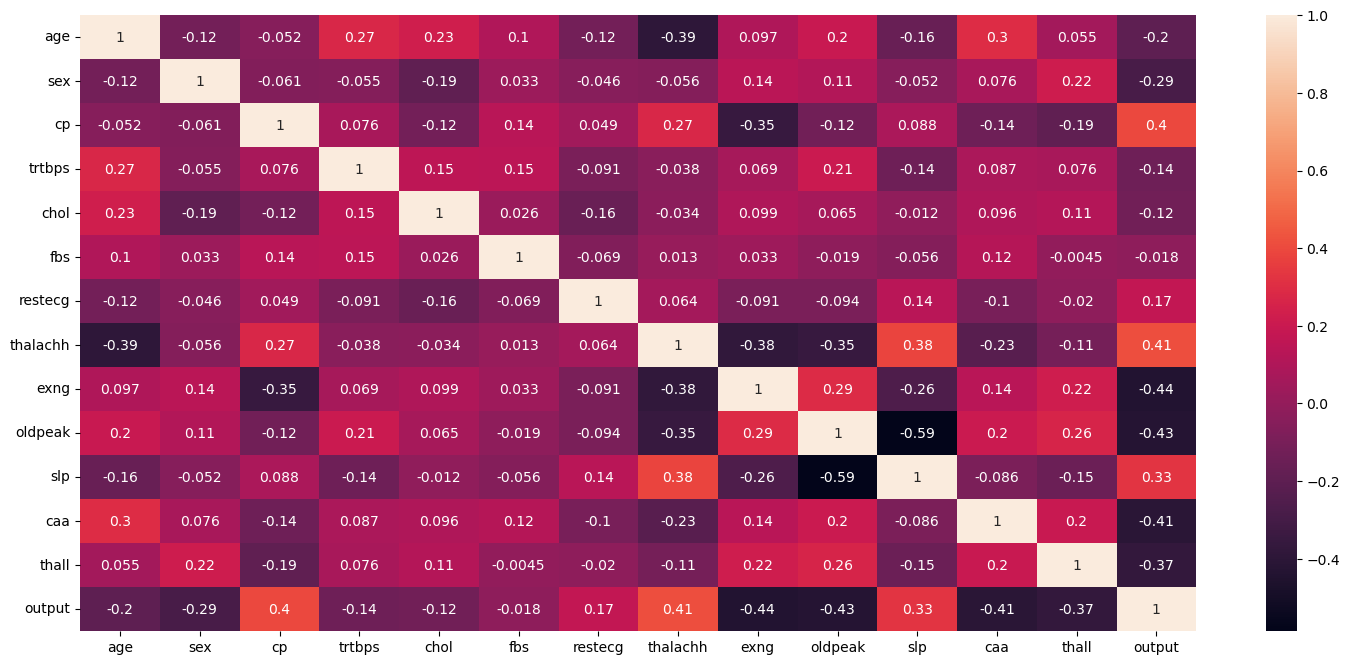

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)
#verinin korelasyon matrisini aldık ve bunu ısı haritası olarak görselleştirdik.

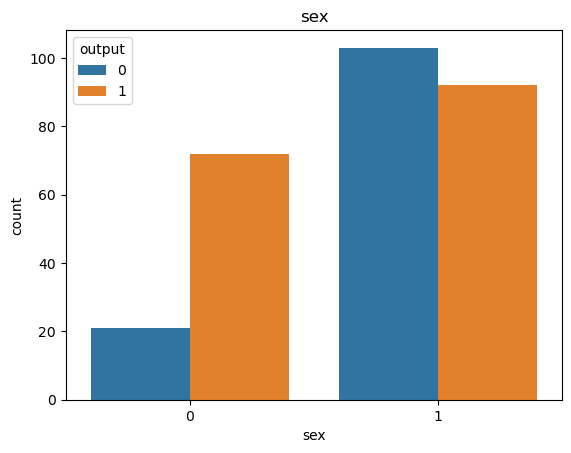

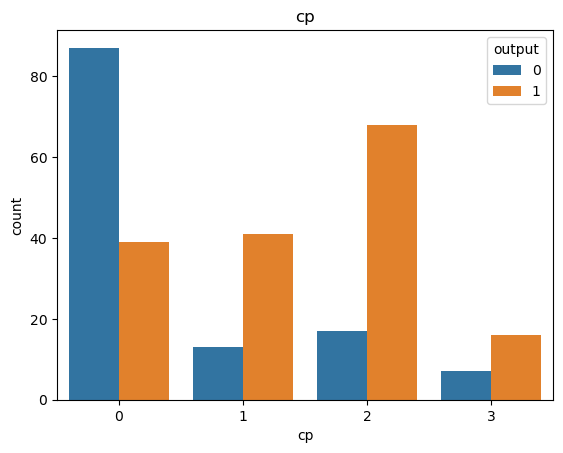

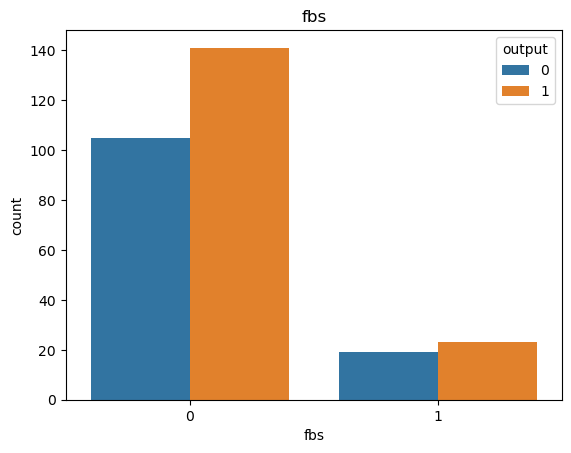

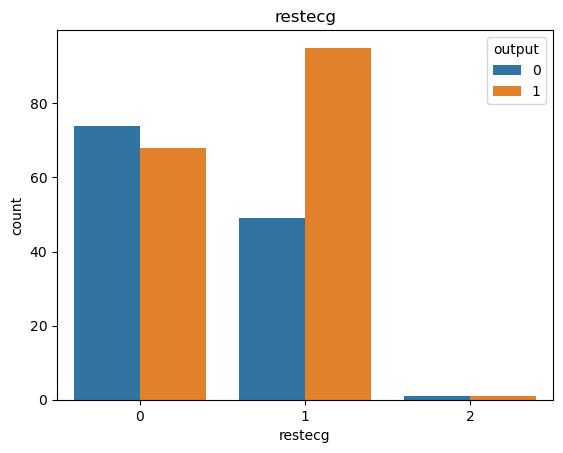

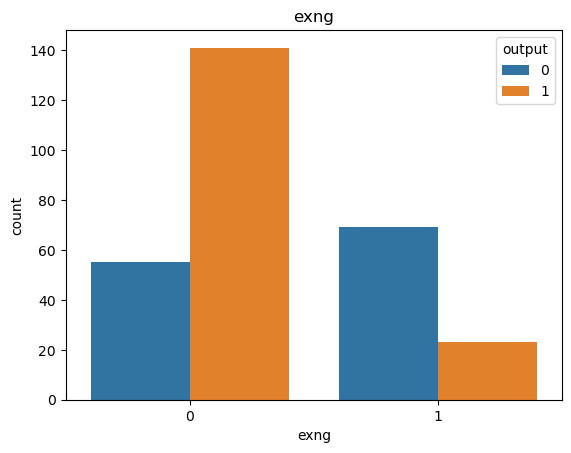

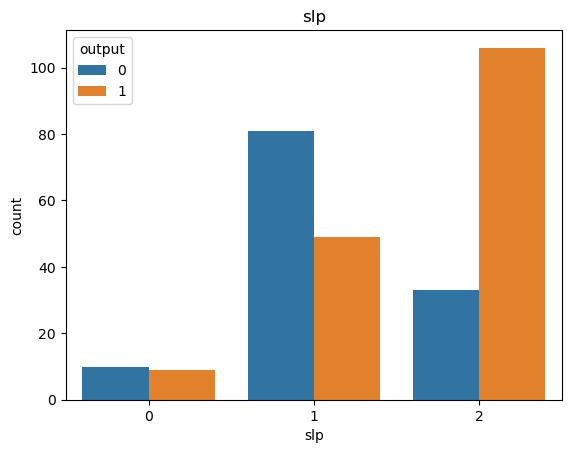

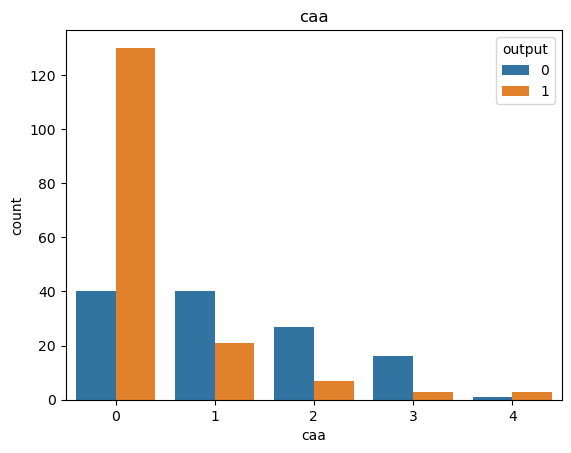

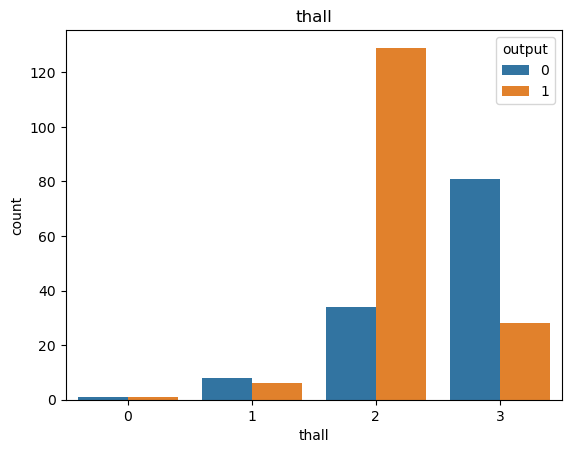

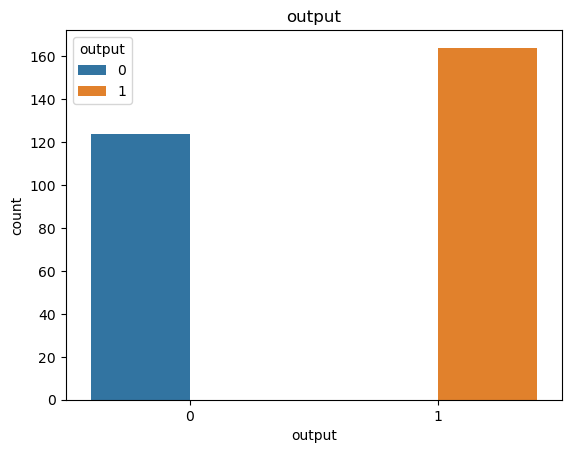

In [17]:
for i in df_kat:   ## Sütunların içinde for döngüsüyle dolaşarak output değerlerinin 0 ve 1 olduğu değerleri bar grafiği ile gösterdik
    plt.figure()
    sns.countplot(x=i,data=df_kat,hue="output")
    plt.title(i)

In [18]:
sayisal = ["age","trtbps","chol","thalachh","oldpeak","output"]

In [19]:
df_sayisal = df[sayisal] #belirli sütunları alarak yeni bir dataframe oluşturdum.
df_sayisal.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,60,145,233,150,2.3,1
1,35,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,55,120,236,178,0.8,1
4,56,120,354,163,0.6,1


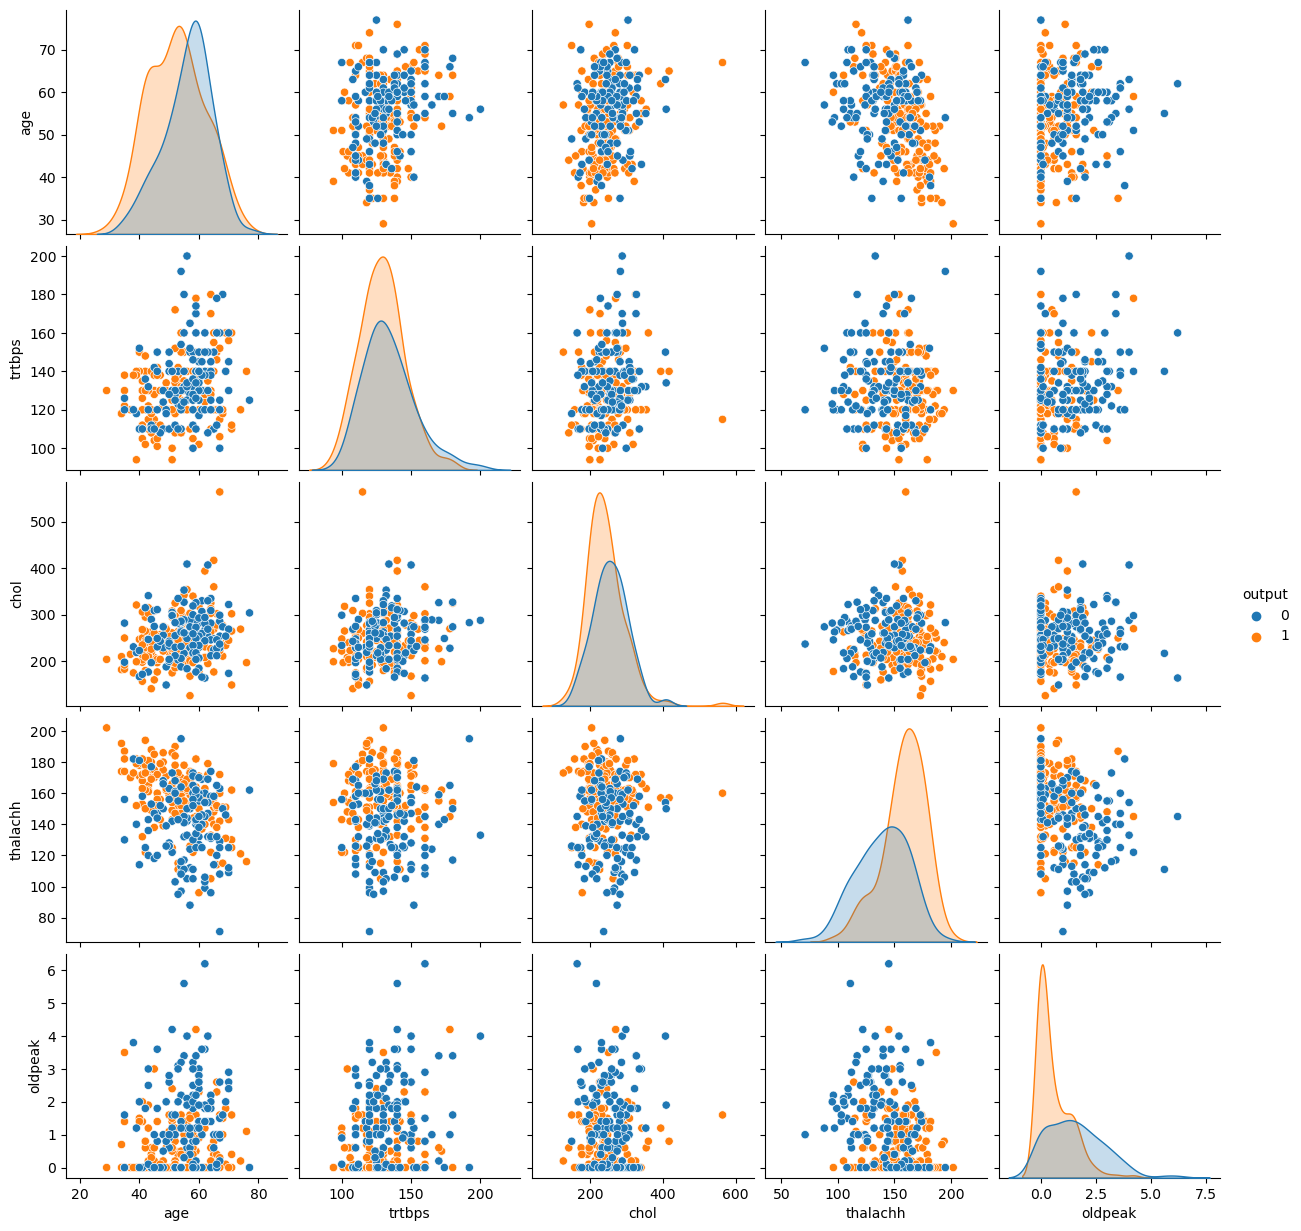

In [20]:
sns.pairplot(df_sayisal,hue="output",diag_kind="kde")
plt.show() # oluşturduğum yeni veri setindeki sütunların sayısal özellikler arasındaki ilişkiyi gösteren bir çift çizim grafiği oluşturdum.

## MAKİNE ÖĞRENMESİ AŞAMALARI

In [21]:
scaler = StandardScaler()

In [22]:
scaled_array=scaler.fit_transform(df[sayisal[:-1]])
scaled_array

array([[ 0.65329095,  0.77913551, -0.29592411, -0.00668314,  1.13866488],
       [-2.09901731, -0.07731879,  0.03471132,  1.61185189,  2.19880114],
       [-1.43846333, -0.07731879, -0.85994924,  0.95568904,  0.34356268],
       ...,
       [ 0.54319862,  0.15106902, -0.85994924,  0.51824714, -0.18650545],
       [-0.00726304,  1.2930081 , -0.31537325,  0.60573552, -0.89326296],
       [-0.11735537, -1.21925786,  1.68788843, -0.31289247,  1.7570777 ]])

In [23]:
df1 = df.copy()
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [24]:
df1 = pd.get_dummies(df1,columns=kategorik[:-1],drop_first=True)
df1.head() #verimizi dummie metoduyla makine öğrenmesine hazır hala getirdim ve dönüştürülen verinin ilk beş satırını görüntüledim.

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,60,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,35,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,55,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,56,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [25]:
x=df1.drop(["output"],axis=1)
y=df1[["output"]]
# Bu kod bloğu, df1 veri çerçevesinden hedef değişkeni ("output") çıkararak bağımsız değişkenleri (x) ve hedef değişkeni (y) ayrı ayrı oluşturur.
# x = df1.drop(["output"], axis=1) ifadesi, df1 veri çerçevesinden "output" sütununu çıkarır ve geri kalan sütunları x değişkenine atar. 
# drop() işlevi, belirtilen sütunu veya sütunları çıkarmak için kullanılır.
# y = df1[["output"]] ifadesi, df1 veri çerçevesinde "output" sütununu y değişkenine atar. Burada sütunun bir DataFrame olarak seçilmesi, bağımlı değişkenin tek bir sütun olarak kalmasını sağlar.

In [26]:
x

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,60,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,35,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,55,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,56,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,60,140,207,138,1.9,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
285,46,140,311,120,1.8,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
286,59,134,204,162,0.8,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
287,54,154,232,164,0.0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [27]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
284,0
285,0
286,0
287,0


In [28]:
x[sayisal[:-1]]=scaler.fit_transform(x[sayisal[:-1]])
x
#  x değişkenindeki sayısal özellikleri ölçeklendirdim ve ölçeklendirilmiş değerleri x'e atadım.

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.653291,0.779136,-0.295924,-0.006683,1.138665,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-2.099017,-0.077319,0.034711,1.611852,2.198801,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.438463,-0.077319,-0.859949,0.955689,0.343563,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.102829,-0.648288,-0.237577,1.218154,-0.186505,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.212922,-0.648288,2.057422,0.561991,-0.363195,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.653291,0.493651,-0.801602,-0.531613,0.785286,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
285,-0.888002,0.493651,1.221109,-1.319009,0.696941,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
286,0.543199,0.151069,-0.859949,0.518247,-0.186505,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
287,-0.007263,1.293008,-0.315373,0.605736,-0.893263,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=5)
# veriyi eğitim ve test setlerine böldüm. Eğitim seti, modelin eğitiminde kullanılacak veri kümesini temsil ederken, test seti ise eğitilen modelin performansını değerlendirmek için kullanılır. Test setinin boyutu test_size parametresiyle belirlenir ve rastgele bir şekilde belirlenen random_state parametresi sayesinde tekrarlanabilirlik sağlanır.

In [30]:
logreg = LogisticRegression()
# lojistik regresyon modeli oluşturdum ve bu modeli logreg adında bir değişkene atadım.

In [31]:
logreg.fit(xtrain,ytrain)
# lojistik regresyon modelini veri setine uyguladım. Bu adım, modelin veri setindeki ilişkiyi anlamasını sağlar ve sınıflandırma yeteneği kazandırır.

C:\Users\mete_\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
ypred_prob = logreg.predict_proba(xtest)
ypred_prob
# eğitilmiş lojistik regresyon modeli (logreg) üzerinden test veri seti (xtest) için sınıf olasılıklarını (ypred_prob) tahmin eder.

array([[0.05367659, 0.94632341],
       [0.94890059, 0.05109941],
       [0.59436335, 0.40563665],
       [0.33579682, 0.66420318],
       [0.7354443 , 0.2645557 ],
       [0.24572321, 0.75427679],
       [0.9067349 , 0.0932651 ],
       [0.89945774, 0.10054226],
       [0.76165319, 0.23834681],
       [0.41767473, 0.58232527],
       [0.22881415, 0.77118585],
       [0.11614663, 0.88385337],
       [0.97980868, 0.02019132],
       [0.04064133, 0.95935867],
       [0.9553098 , 0.0446902 ],
       [0.0805317 , 0.9194683 ],
       [0.98543586, 0.01456414],
       [0.18169444, 0.81830556],
       [0.19186213, 0.80813787],
       [0.9739137 , 0.0260863 ],
       [0.95152497, 0.04847503],
       [0.049418  , 0.950582  ],
       [0.90415719, 0.09584281],
       [0.0452068 , 0.9547932 ],
       [0.35564517, 0.64435483],
       [0.9192037 , 0.0807963 ],
       [0.04391801, 0.95608199],
       [0.39724932, 0.60275068],
       [0.29856457, 0.70143543],
       [0.08845463, 0.91154537],
       [0.

In [33]:
ypred=np.argmax(ypred_prob,axis=1)
ypred
# tahmin edilen sınıf olasılıklarının (ypred_prob) en yüksek olasılığa sahip sınıfın indeksini (ypred) tahmin eder.

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [34]:
dummy= pd.DataFrame(ypred_prob)
dummy["ypred"]=ypred
dummy.head()

,0,1,ypred
0,0.053677,0.946323,1
1,0.948901,0.051099,0
2,0.594363,0.405637,0
3,0.335797,0.664203,1
4,0.735444,0.264556,0


In [35]:
print("Test Accuracy",accuracy_score(ypred,ytest))

Test Accuracy 0.8863636363636364
